<a href="https://colab.research.google.com/github/Asit-1121130118/practice-projects/blob/master/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Importing all the required libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
# importingthe file

data = pd.read_csv('/content/drive/MyDrive/datasets/Churn.csv', na_values = np.nan)
print(data.shape)

(7043, 21)


In [5]:
pd.set_option('display.max_columns', None)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In the dataset almost all the fetures type are in object format. Except for SeniorCitizen, MonthlyCharges,tenure. Since, most of the data are in categorical form, by applying one hot encoding we can change the types of features and also after encoding of categorical features; outliers will not be that important to eliminate.

------------------------------

***checking for null values***

In [7]:
data.isnull().sum()  # there is no missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

there is no missing values in the data

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# applying the lambda function and pandas apply function to check for unique value

data.apply(lambda col: ','.join(map(str, col.unique())))

customerID          7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,92...
gender                                                    Female,Male
SeniorCitizen                                                     0,1
Partner                                                        Yes,No
Dependents                                                     No,Yes
tenure              1,34,2,45,8,22,10,28,62,13,16,58,49,25,69,52,7...
PhoneService                                                   No,Yes
MultipleLines                                 No phone service,No,Yes
InternetService                                    DSL,Fiber optic,No
OnlineSecurity                             No,Yes,No internet service
OnlineBackup                               Yes,No,No internet service
DeviceProtection                           No,Yes,No internet service
TechSupport                                No,Yes,No internet service
StreamingTV                                No,Yes,No internet service
StreamingMovies     

In [10]:
df = data.copy()
df.shape

(7043, 21)

In [11]:
df = df.drop('customerID', axis=1)

***Encoding the categorical features***

In [12]:
temp1 = df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]

In [13]:
temp1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.5
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [14]:
df = df.drop(['SeniorCitizen','tenure','MonthlyCharges','TotalCharges'], axis=1)

In [15]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [16]:
df = pd.concat([df,temp1], axis=1)
df.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,29.85,29.85
1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,34,56.95,1889.5
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,2,53.85,108.15
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,2,70.70,151.65


In [17]:
df.shape

(7043, 31)

In [18]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

the above changes could have been also done by using astype(float) function but it was showing some error in converting the string to float. so used different method for change


In [19]:
df.isnull().sum()

gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet service       0
StreamingMovies_Yes                       0
Contract_One year                         0
Contract_Two year                         0
PaperlessBilling_Yes            

In [20]:
df['TotalCharges'] = df['TotalCharges'].replace(np.nan, df['TotalCharges'].mean())

In [21]:
df.isnull().sum()

gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMovies_Yes                      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     0
PaymentMeth

In [22]:
df.dtypes

gender_Male                                uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes                            uint8
StreamingTV_No internet service            uint8
StreamingTV_Yes                            uint8
StreamingMovies_No internet service        uint8
StreamingMovies_Yes                        uint8
Contract_One year   

**splitting the data into train and valid**

In [23]:
train = df[:4000]
valid = df[4000:]
valid = valid.drop('Churn_Yes', axis=1)
print(train.shape)
print(valid.shape)

(4000, 31)
(3043, 30)


**scaling the MonthlyCharges and TotalCharges**

In [24]:
from sklearn.preprocessing import StandardScaler

temp = train[['MonthlyCharges','TotalCharges']]
scaler = StandardScaler()
scaler.fit(temp)
temp = pd.DataFrame(scaler.transform(temp), columns= ['MonthlyCharges','TotalCharges'])
temp

,MonthlyCharges,TotalCharges
0,-1.166892,-0.987321
1,-0.265985,-0.166066
2,-0.369041,-0.952742
3,-0.753007,-0.187595
4,0.191117,-0.933532
...,...,...
3995,0.330741,-0.086994
3996,-1.469411,-0.785413
3997,-0.116388,0.823909
3998,-0.347432,0.015726


In [25]:
train = train.drop(['MonthlyCharges','TotalCharges'], axis=1)
train = pd.concat([train,temp], axis=1)

***Importing the libraries for model building and prediction***

In [26]:
from sklearn.linear_model import (RidgeClassifier,
                                  Ridge,
                                  SGDClassifier,
                                 LogisticRegression)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (AdaBoostClassifier,
                              ExtraTreesClassifier,
                              RandomForestClassifier,
                              GradientBoostingClassifier,
                              BaggingClassifier,
                              IsolationForest)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             f1_score,
                             classification_report,
                             roc_auc_score,
                             roc_curve,
                             plot_roc_curve,
                             precision_recall_curve)

**Applying the ExtraTreeClassifier for selecting the important features for prediction**

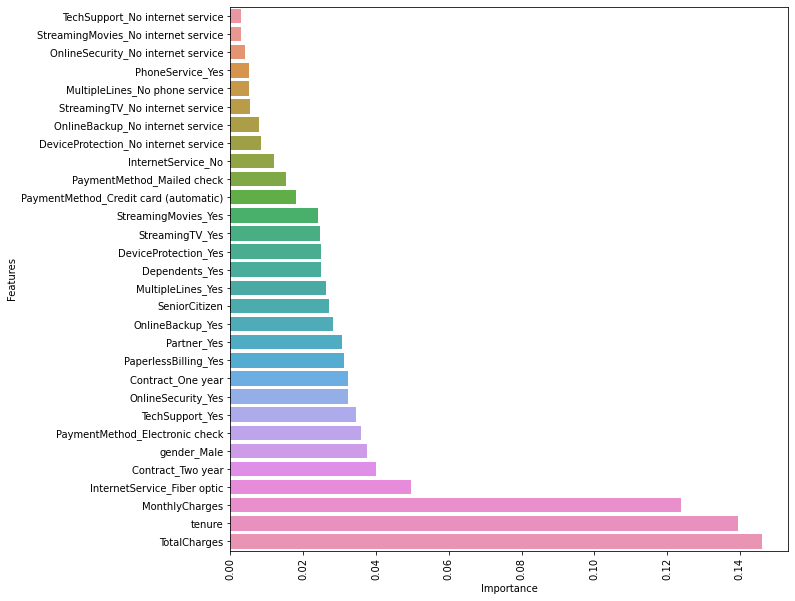

                                 Features  Importance
14        TechSupport_No internet service    0.002842
18    StreamingMovies_No internet service    0.002888
8      OnlineSecurity_No internet service    0.004071
3                        PhoneService_Yes    0.005049
4          MultipleLines_No phone service    0.005117
16        StreamingTV_No internet service    0.005264
10       OnlineBackup_No internet service    0.007946
12   DeviceProtection_No internet service    0.008336
7                      InternetService_No    0.011894
25             PaymentMethod_Mailed check    0.015191
23  PaymentMethod_Credit card (automatic)    0.018143
19                    StreamingMovies_Yes    0.024156
17                        StreamingTV_Yes    0.024646
13                   DeviceProtection_Yes    0.024855
2                          Dependents_Yes    0.025011
5                       MultipleLines_Yes    0.026380
26                          SeniorCitizen    0.027085
11                       Onl

In [27]:
modelfe = ExtraTreesClassifier()
modelfe.fit(train.drop('Churn_Yes', axis=1), train['Churn_Yes'])
dictio = {'Features':train.drop('Churn_Yes', axis=1).columns, 'Importance':modelfe.feature_importances_}
feature_select = pd.DataFrame(dictio)
plt.figure(figsize=(10,10))
feature_select = feature_select.sort_values(by='Importance')
sns.barplot(x='Importance', y='Features',data=feature_select)
plt.xticks(rotation=90)
plt.show()
print(feature_select)

By viewing the above result,  we can say that few of the features are much important in prediction, and can also give important insight for churn. TotalCharges, tenure, MonthlyCharges, contract period, TechSupport, Partner, PaperlessBilling are playing the important roles and by consedering these features we can easily determine and convert the churners to stay in connect with company.

In [28]:
list(feature_select['Features'][feature_select['Importance']>=0.03])

['Partner_Yes',
 'PaperlessBilling_Yes',
 'Contract_One year',
 'OnlineSecurity_Yes',
 'TechSupport_Yes',
 'PaymentMethod_Electronic check',
 'gender_Male',
 'Contract_Two year',
 'InternetService_Fiber optic',
 'MonthlyCharges',
 'tenure',
 'TotalCharges']

In [29]:
X = train[['TechSupport_Yes',
 'Partner_Yes',
 'PaperlessBilling_Yes',
 'Contract_One year',
 'OnlineSecurity_Yes',
 'gender_Male',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
          'InternetService_Fiber optic',
          'MonthlyCharges',
          'tenure',
          'TotalCharges']]
y = train['Churn_Yes']

In [30]:
print(X.shape)
print(y.shape)

(4000, 12)
(4000,)


***Splitting the train and test data for model training***

In [32]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.2,random_state=0)

***Testing each model accuracy on training data***

In [35]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('Linear_SVC', LinearSVC()))
models.append(('SGD', SGDClassifier(max_iter=5, tol=None)))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators = 100)))
models.append(('abc', AdaBoostClassifier()))

In [36]:
results = []
names = []
for name, model in models:
  cv_result = cross_val_score(model, xtrain,ytrain, scoring='accuracy', cv=10)
  results.append(cv_result)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_result.mean(), cv_result.std()))

LR: 0.796563 (0.024782)
SVC: 0.784375 (0.016536)
Linear_SVC: 0.733437 (0.079070)
SGD: 0.766562 (0.041577)
NB: 0.738125 (0.039301)
RF: 0.781562 (0.018825)
abc: 0.795937 (0.031032)


-----------------------

# ***Defining ROC_AUC curve***

In [37]:
def plot_roc(model,xtest,ytest,color='b'):
    proba = model.predict_proba(xtest)[:,1]
    fpr, tpr, thresholds = roc_curve(ytest, proba)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color, label = 'AUC = %0.2f' % roc_auc_score(ytest,ypred))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'k--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [38]:
np.unique(ytest, return_counts=True)

(array([0, 1], dtype=uint8), array([582, 218]))

In [39]:
np.unique(ytrain, return_counts=True)

(array([0, 1], dtype=uint8), array([2361,  839]))

# **Logistic Regression**

In [40]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced',random_state=11)
lr.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=11, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
ypred = lr.predict(xtest)

0.765
              precision    recall  f1-score   support

           0       0.93      0.74      0.82       582
           1       0.54      0.84      0.66       218

    accuracy                           0.77       800
   macro avg       0.74      0.79      0.74       800
weighted avg       0.82      0.77      0.78       800

[[428 154]
 [ 34 184]]
AUC ->  0.7897159431255715


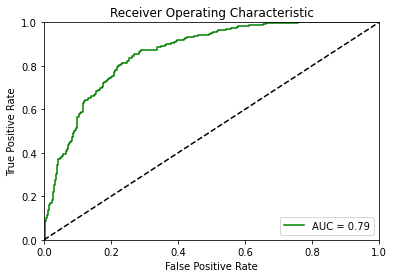

In [42]:
print(metrics.accuracy_score(ytest, ypred))
print(metrics.classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print("AUC -> ",roc_auc_score(ytest,ypred))
plot_roc(lr,xtest,ytest,'g')

[[436 146]
 [ 40 178]]
              precision    recall  f1-score   support

           0       0.92      0.75      0.82       582
           1       0.55      0.82      0.66       218

    accuracy                           0.77       800
   macro avg       0.73      0.78      0.74       800
weighted avg       0.82      0.77      0.78       800

AUC ->  0.7828273274693401


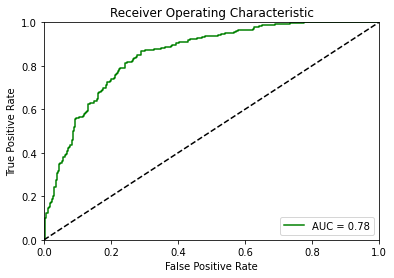

In [43]:
model = LogisticRegression(C=0.01, class_weight='balanced', max_iter=2000,
                   random_state=10, tol=10)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print("AUC -> ",roc_auc_score(ytest,ypred))
plot_roc(model,xtest,ytest,'g')

In [44]:
thresholds = roc_curve(ytest, lr.predict_proba(xtest)[:,1])[2]

In [45]:
ypred = lr.predict_proba(xtest)[:,1]

In [46]:
f1 = []
for threshold in thresholds:
    temp = []
    for i in ypred:
        if i<threshold:
            temp.append(0)
        else:
            temp.append(1)
    f1.append(f1_score(ytest, temp))

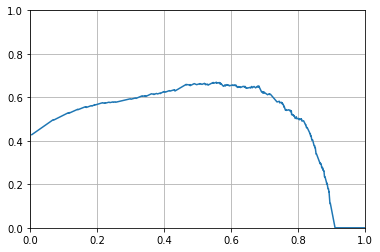

In [47]:
plt.plot(thresholds, f1)
plt.grid(True)
plt.ylim([0,1])
plt.xlim([0,1])
plt.show()

In [48]:
thresholds[np.argmax(f1)]

0.5560974320205885

In [49]:
pred = []
for i in ypred:
    if i<0.5560974320205885:
        pred.append(0)
    else:
        pred.append(1)
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

[[452 130]
 [ 43 175]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       582
           1       0.57      0.80      0.67       218

    accuracy                           0.78       800
   macro avg       0.74      0.79      0.75       800
weighted avg       0.82      0.78      0.79       800



# **RANDOM FOREST**

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
rf_pred = rf.predict(xtest)

In [51]:
metrics.accuracy_score(ytest, rf_pred)

0.7875

[[516  66]
 [104 114]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       582
           1       0.63      0.52      0.57       218

    accuracy                           0.79       800
   macro avg       0.73      0.70      0.72       800
weighted avg       0.78      0.79      0.78       800

F1 ->  0.5728643216080402
Accuracy ->  0.7875


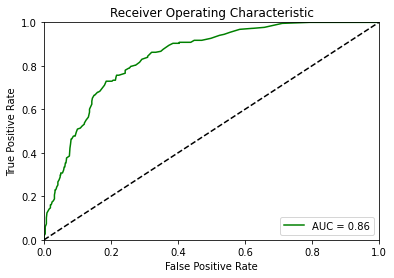

In [52]:
print(confusion_matrix(ytest,rf_pred))
print(classification_report(ytest,rf_pred))
print("F1 -> ",f1_score(ytest,rf_pred))
print("Accuracy -> ",accuracy_score(ytest,rf_pred))
plot_roc(rf,xtest,ytest,'g')

In [53]:
params = {'n_estimators':[200,500,700,1000,2000],
          'max_depth':[8,10,15,20,30],
          'min_samples_split':[2,3,5,8]}

RandomCV = RandomizedSearchCV(estimator = RandomForestClassifier(random_state =10, oob_score=True),
                              cv =5,
                              n_iter =10,
                              verbose =2,
                              param_distributions =params,
                              random_state =12,
                              scoring ='f1')

RandomCV.fit(xtrain,ytrain)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=8, max_depth=8 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=8, max_depth=8, total=   2.5s
[CV] n_estimators=700, min_samples_split=8, max_depth=8 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=8, max_depth=8, total=   2.4s
[CV] n_estimators=700, min_samples_split=8, max_depth=8 ..............
[CV]  n_estimators=700, min_samples_split=8, max_depth=8, total=   2.4s
[CV] n_estimators=700, min_samples_split=8, max_depth=8 ..............
[CV]  n_estimators=700, min_samples_split=8, max_depth=8, total=   2.4s
[CV] n_estimators=700, min_samples_split=8, max_depth=8 ..............
[CV]  n_estimators=700, min_samples_split=8, max_depth=8, total=   2.4s
[CV] n_estimators=500, min_samples_split=2, max_depth=15 .............
[CV]  n_estimators=500, min_samples_split=2, max_depth=15, total=   2.1s
[CV] n_estimators=500, min_samples_split=2, max_depth=15 .............
[CV]  n_estimators=500, min_samples_split=2, max_depth=15, total=   2.0s
[CV] n_estimators=500, min_samples_split=2, max_depth=15 .............
[CV]  n_estimators=500, min_samples_split=2, max_depth=15, total=   2.1s
[CV] n_estimators=500, min_samples_split=2, max_depth=15 ..........

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [54]:
RandomCV.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=10, verbose=0,
                       warm_start=False)

[[531  51]
 [103 115]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       582
           1       0.69      0.53      0.60       218

    accuracy                           0.81       800
   macro avg       0.77      0.72      0.74       800
weighted avg       0.80      0.81      0.80       800

F1 ->  0.6692160611854684
Accuracy ->  0.78375


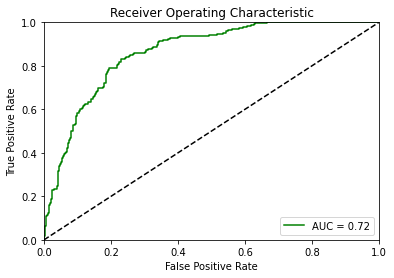

In [55]:
model = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=500,
                       oob_score=True, random_state=10)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print("F1 -> ",f1_score(ytest,pred))
print("Accuracy -> ",accuracy_score(ytest,pred))
plot_roc(model,xtest,ytest,'g')

In [56]:
thresholds = precision_recall_curve(ytest, model.predict_proba(xtest)[:,1])[2]

In [57]:
ypred = model.predict_proba(xtest)[:,1]

In [58]:
f1 = []
for threshold in thresholds:
    temp = []
    for i in ypred:
        if i<threshold:
            temp.append(0)
        else:
            temp.append(1)
    f1.append(f1_score(ytest, temp))

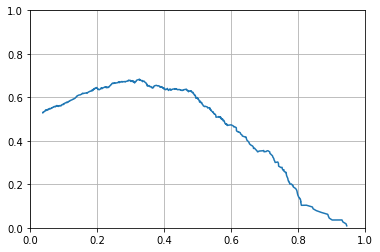

In [59]:
plt.plot(thresholds, f1)
plt.grid(True)
plt.ylim([0,1])
plt.xlim([0,1])
plt.show()

In [60]:
thresholds[np.argmax(f1)]

0.32639820087639076

In [61]:
pred = []
for i in ypred:
    if i<0.32639820087639076:
        pred.append(0)
    else:
        pred.append(1)
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))
print("F1 -> ",f1_score(ytest,pred))
print("Accuracy -> ",accuracy_score(ytest,pred))

[[469 113]
 [ 46 172]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       582
           1       0.60      0.79      0.68       218

    accuracy                           0.80       800
   macro avg       0.76      0.80      0.77       800
weighted avg       0.83      0.80      0.81       800

F1 ->  0.6838966202783301
Accuracy ->  0.80125


# **GBM**

[[564  18]
 [169  49]]
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       582
           1       0.73      0.22      0.34       218

    accuracy                           0.77       800
   macro avg       0.75      0.60      0.60       800
weighted avg       0.76      0.77      0.72       800

F1 ->  0.6838966202783301
Accuracy ->  0.80125


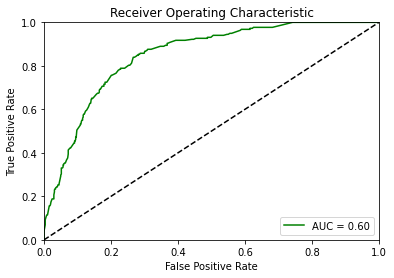

In [62]:
model = GradientBoostingClassifier(learning_rate=0.01)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print("F1 -> ",f1_score(ytest,pred))
print("Accuracy -> ",accuracy_score(ytest,pred))
plot_roc(model,xtest,ytest,'g')

--------------------------

# **Prediction on Validation Data**

In [91]:
val = df[4000:]

In [92]:
valid = val.copy()

In [93]:
valid.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4000,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,39,99.75,4036.00
4001,1,1,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,45,109.75,4900.65
4002,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,72,80.85,5727.45
4003,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,38,20.30,743.05
4004,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,72,67.80,4804.65


In [94]:
valid.reset_index(inplace=True)
del valid['index']
valid

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,39,99.75,4036.00
1,1,1,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,45,109.75,4900.65
2,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,72,80.85,5727.45
3,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,38,20.30,743.05
4,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,72,67.80,4804.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,24,84.80,1990.50
3039,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0,0,72,103.20,7362.90
3040,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,11,29.60,346.45
3041,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,4,74.40,306.60


In [95]:
valid.isnull().sum()

gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMovies_Yes                      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     0
PaymentMeth

In [96]:
temp = valid[['MonthlyCharges','TotalCharges']]
scaler = StandardScaler()
scaler.fit(temp)
temp = pd.DataFrame(scaler.transform(temp), columns= ['MonthlyCharges','TotalCharges'])
temp

,MonthlyCharges,TotalCharges
0,1.170848,0.763442
1,1.503124,1.145151
2,0.542846,1.510151
3,-1.469085,-0.690267
4,0.109226,1.102771
...,...,...
3038,0.674095,-0.139567
3039,1.285483,2.232139
3040,-1.160069,-0.865351
3041,0.328528,-0.882943


In [97]:
valid = valid.drop(['MonthlyCharges','TotalCharges'], axis=1)
valid = pd.concat([valid,temp], axis=1)

In [98]:
valid = valid[['TechSupport_Yes',
 'Partner_Yes',
 'PaperlessBilling_Yes',
 'Contract_One year',
 'OnlineSecurity_Yes',
 'gender_Male',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
          'InternetService_Fiber optic',
          'MonthlyCharges',
          'tenure',
          'TotalCharges']]

***Random forest for data prediction***

In [99]:
RF = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=500,
                       oob_score=True, random_state=10)

In [100]:
RF.fit(X,y)
RFpred = RF.predict_proba(valid)[:,1]

In [101]:
RFout = []
for i in RFpred:
    if i<0.32639820087639076:
        RFout.append(0)
    else:
        RFout.append(1)

***Logistic Regression for Data prediction***

In [102]:
LR = LogisticRegression(C=0.01, class_weight='balanced', max_iter=2000,
                   random_state=10, tol=10)

In [103]:
LR.fit(X,y)
LRpred = LR.predict_proba(valid)[:,1]

In [104]:
LRout = []
for i in LRpred:
    if i<0.5560974320205885:
        LRout.append(0)
    else:
        LRout.append(1)

In [107]:
final_RF = pd.DataFrame({'ID': list(data['customerID'][4000:].values), 'Churn': RFout})
# 'logistic': logisticout
 
final_RF.head(20)

,ID,Churn
0,0420-HLGXF,1
1,7446-KQISO,0
2,9823-EALYC,0
3,0582-AVCLN,0
4,5803-NQJZO,0
5,2565-JSLRY,1
6,2607-DHDAK,0
7,1073-XXCZD,0
8,0743-HRVFF,0
9,4006-HKYHO,0


## **comparing the result of both the model**

In [108]:
final = pd.DataFrame({'ID': list(data['customerID'][4000:].values), 'ChurnRF': RFout, 'ChurnLR': LRout})
# 'logistic': logisticout
 
final.head(20)

,ID,ChurnRF,ChurnLR
0,0420-HLGXF,1,1
1,7446-KQISO,0,0
2,9823-EALYC,0,0
3,0582-AVCLN,0,0
4,5803-NQJZO,0,0
5,2565-JSLRY,1,0
6,2607-DHDAK,0,0
7,1073-XXCZD,0,0
8,0743-HRVFF,0,0
9,4006-HKYHO,0,0


In [109]:
final[['ID', 'ChurnRF','ChurnLR']].to_csv("output.csv",index = False, header=True)